# Book Recommendation System

### Dataset used - Books, Users, Rating


In [592]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Image
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from surprise import Reader, Dataset
from surprise import SVD, model_selection, accuracy
from collections import defaultdict


###### Books Dataset

In [593]:
book_data = pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Books.csv")
books=pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Books.csv")
book_data.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [594]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271358 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [595]:
book_data.shape

(271360, 8)

###### Users Dataset

In [596]:
users_data= pd.read_csv('E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Users.csv')
users=pd.read_csv('E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Users.csv')
users_data.head()

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [597]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [598]:
users_data.shape

(278858, 3)

##### Ratings Dataset

In [599]:
ratings_data = pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Ratings.csv")
ratings=pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Ratings.csv")
ratings_data.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [600]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User_ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book_Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [601]:
ratings_data.shape

(1048575, 3)

### Data Cleaning And Feature Engineering

##### Books Data

In [602]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [603]:
pd.set_option('display.max_colwidth',1)

In [604]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [605]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [606]:
book_data.loc[(book_data['book_author'].isnull()),: ]
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [607]:
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [608]:
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [609]:
book_data.loc[221678]
book_data.loc[209538]
book_data.loc[220731]

isbn                   2070426769                                                              
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Name: 220731, dtype: object

In [610]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [611]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [612]:
book_data.loc[209538]
book_data.loc[221678]
book_data.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

In [613]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [614]:
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [615]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [616]:
pd.set_option('display.max_columns', None)  
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [617]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


##### Users Data

In [618]:
print(users_data.shape)

(278858, 3)


In [619]:
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [620]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [621]:
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [622]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

##### Ratings Data

In [623]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [624]:
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [625]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1048575, 3)
(941112, 3)


In [626]:
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

### Data Viz

###### Books Data

Text(0.5, 1.0, 'Top 20 author with number of books')

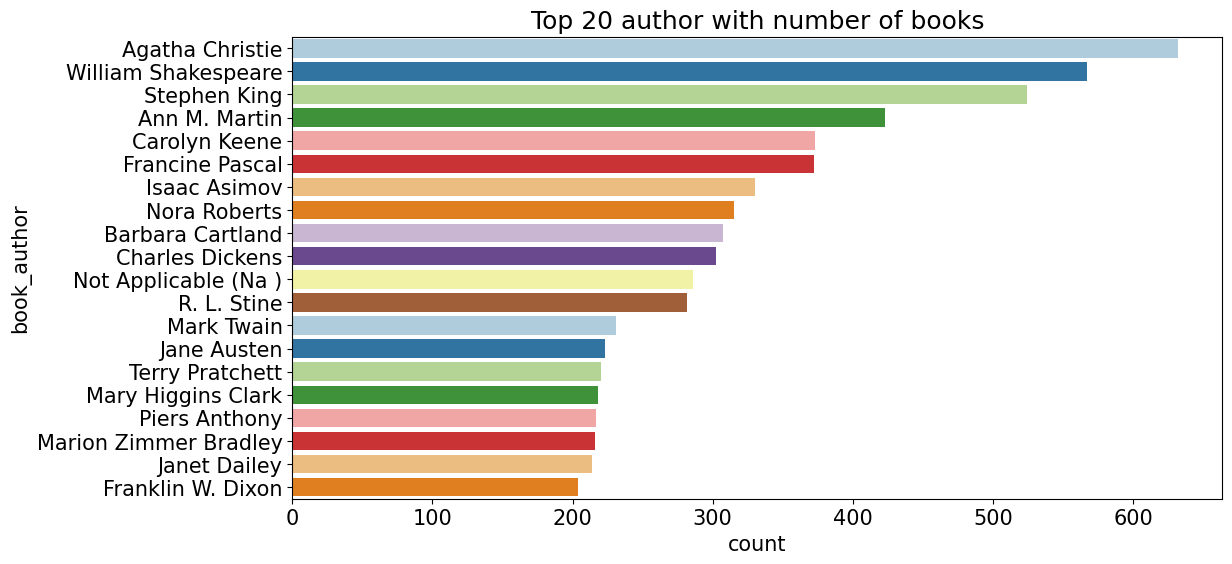

In [627]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

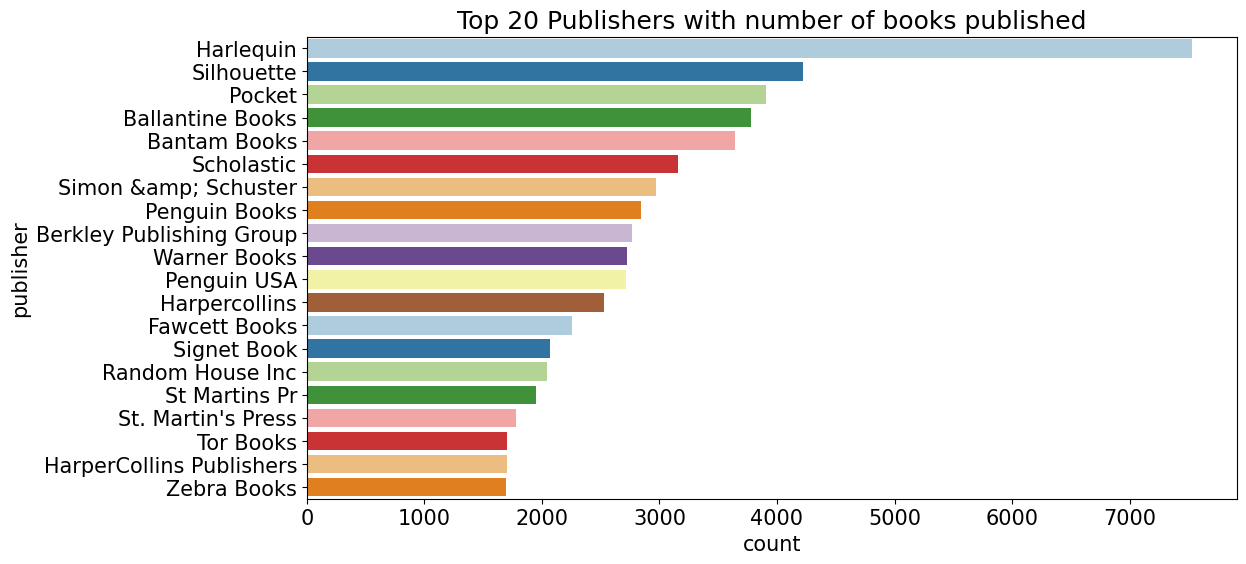

In [628]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

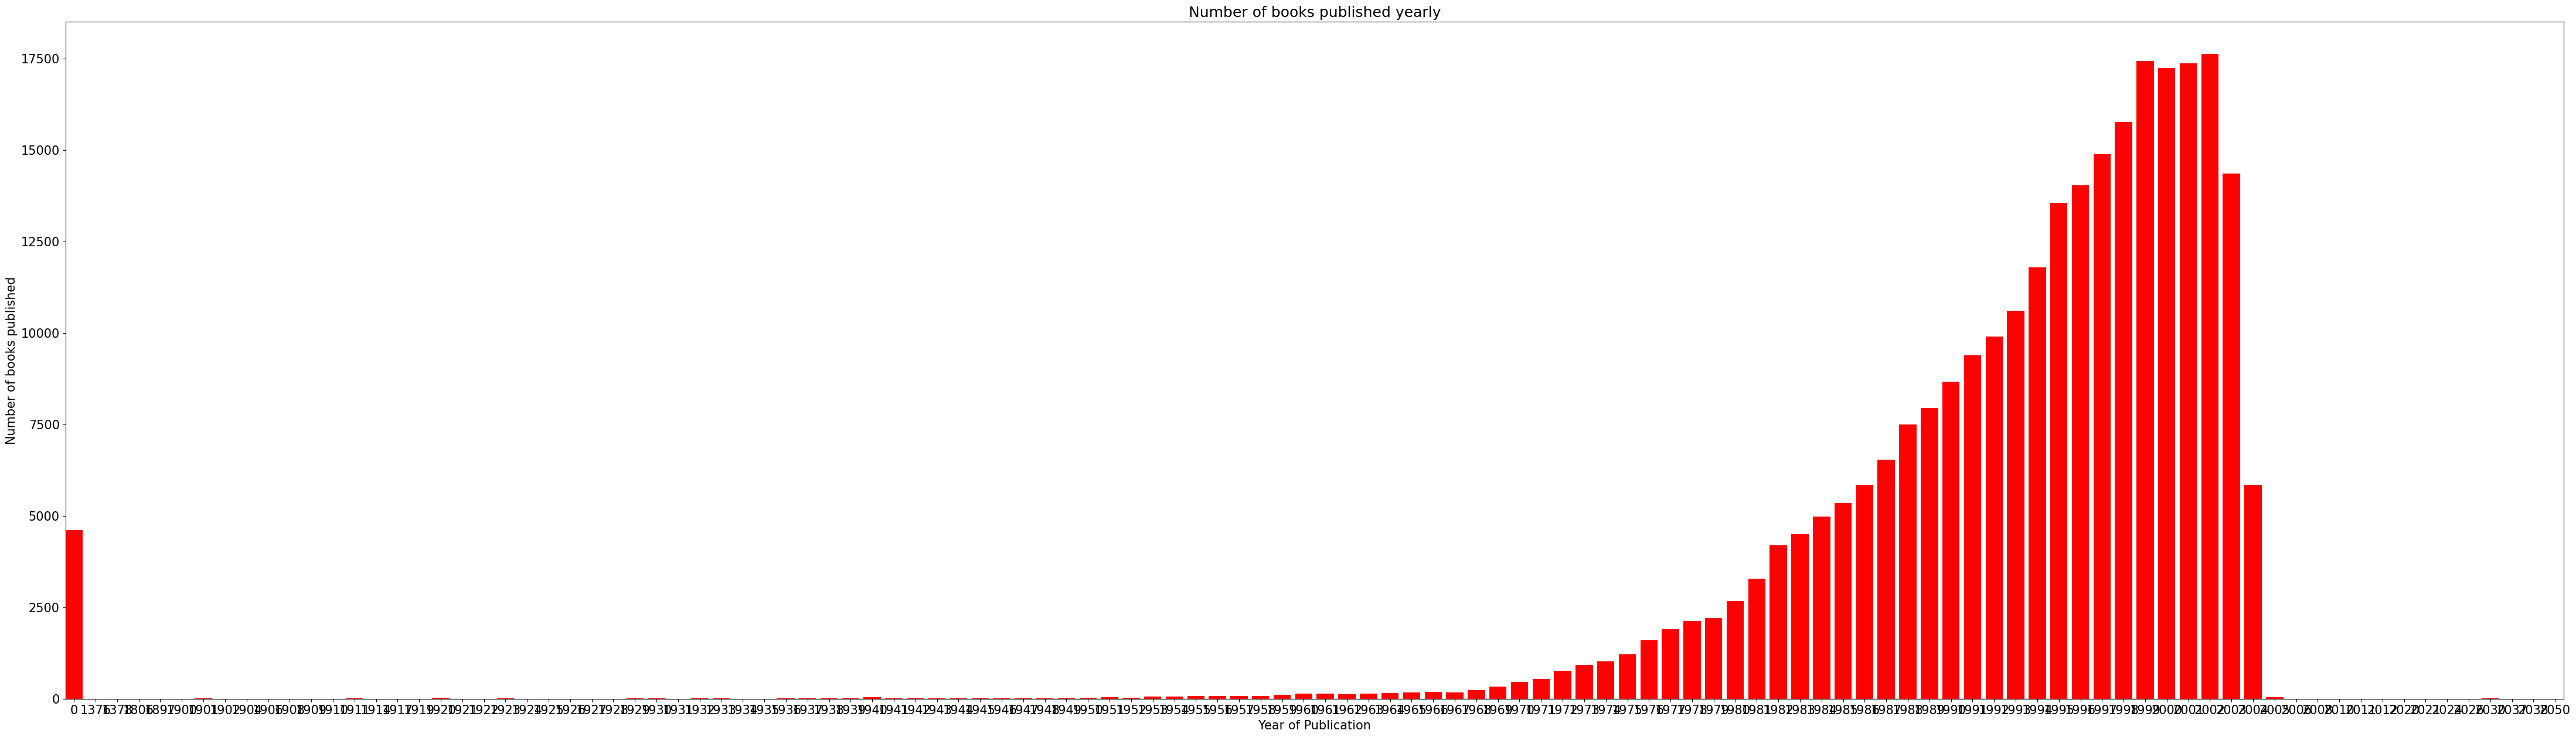

In [629]:
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'red')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [630]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce') 
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()
print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


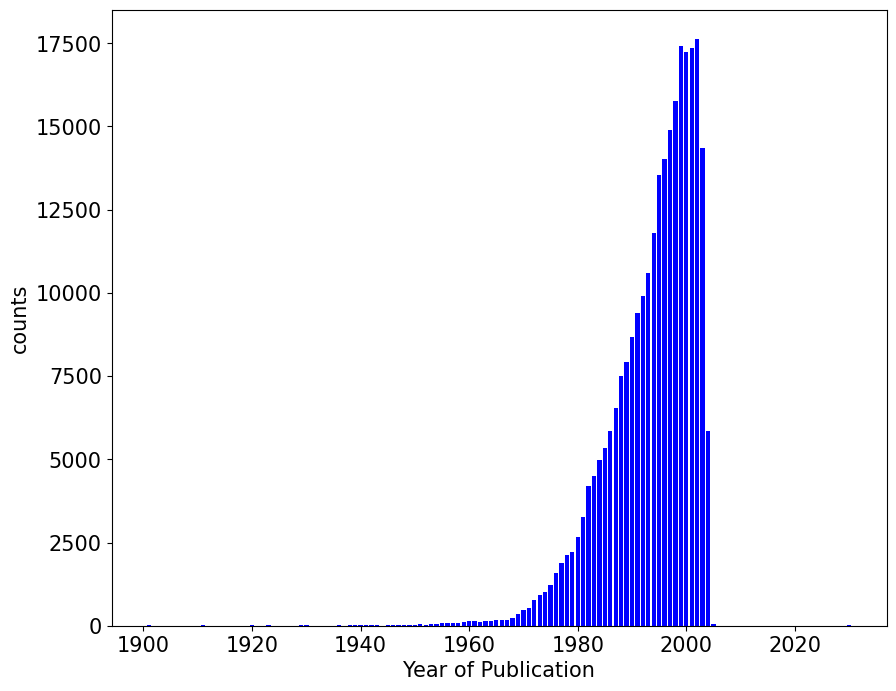

In [631]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values, color="blue")
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

##### Users Data

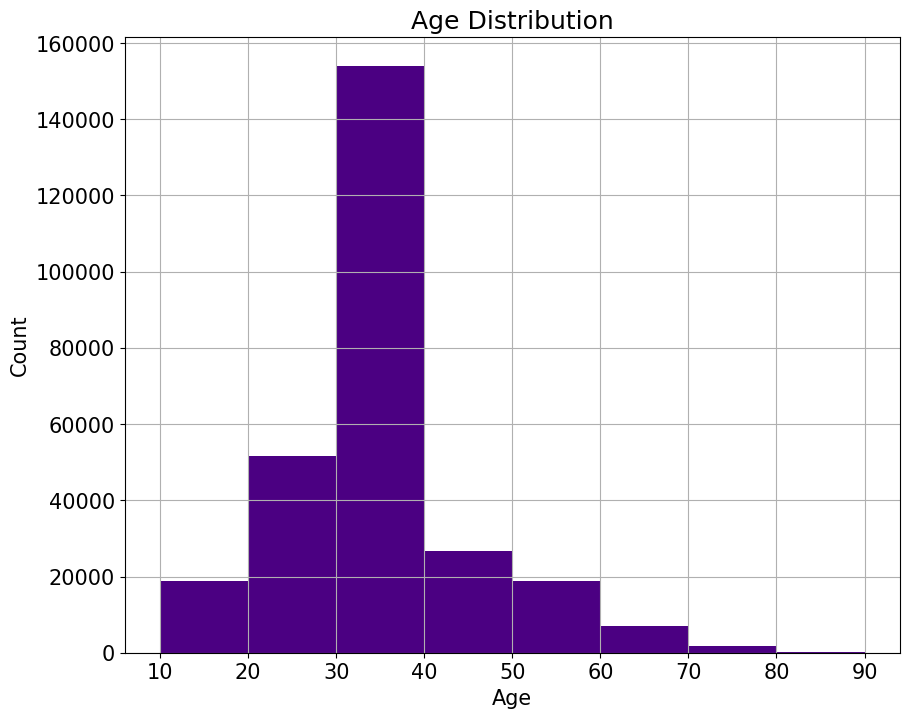

In [632]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'indigo')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

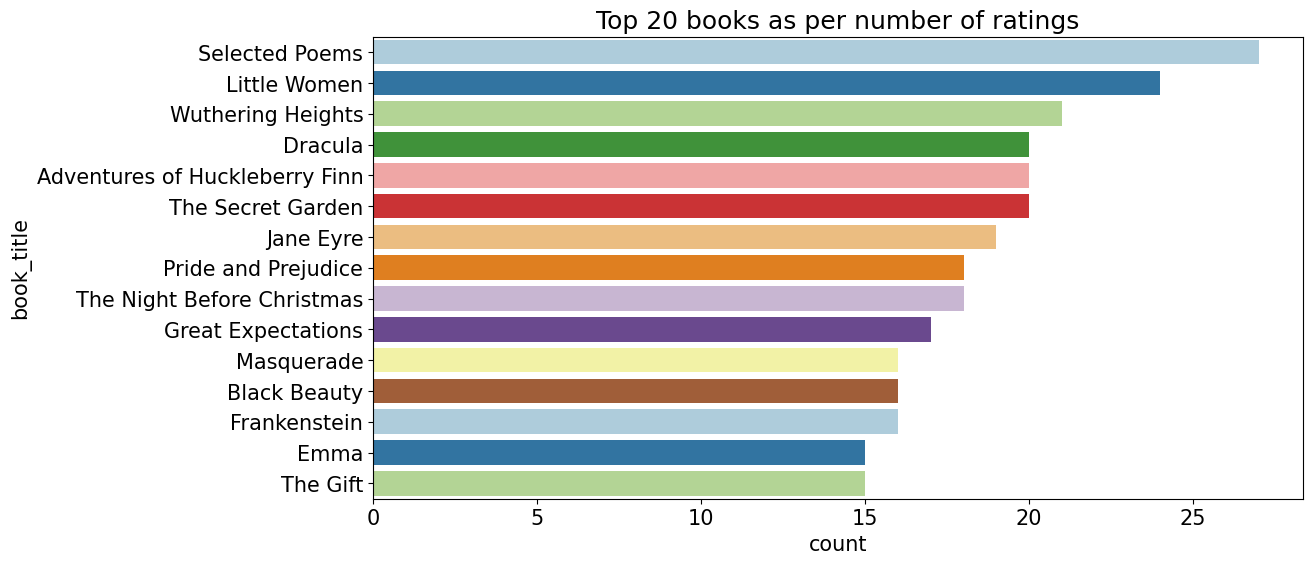

In [633]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

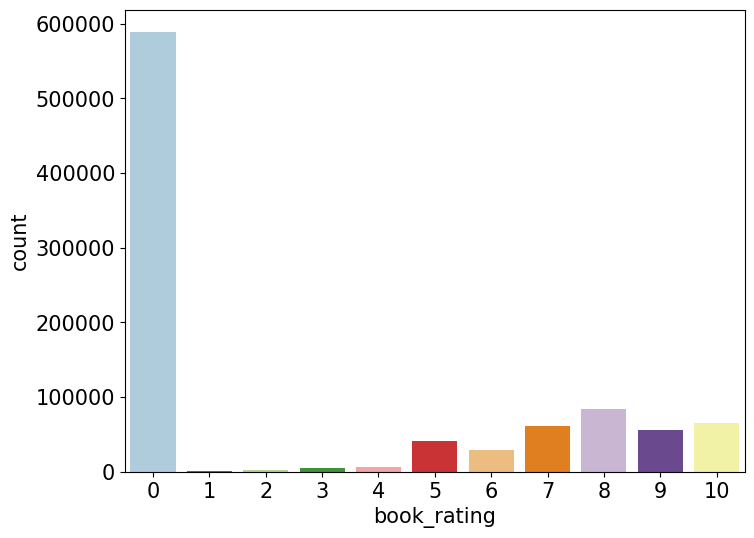

In [634]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

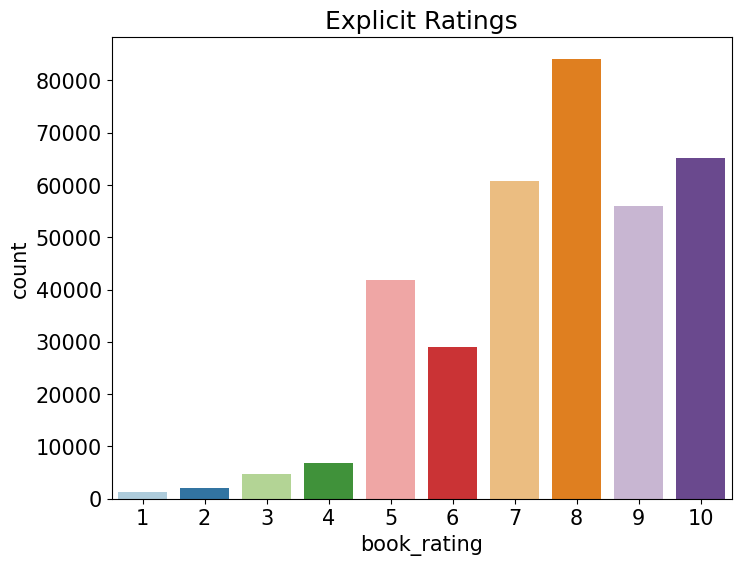

In [635]:
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Recommendation System

### 1> Popularity Based Recommendation System

In [636]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [637]:
ratings_with_name.groupby('Book_Title').count()

,User_ID,ISBN,Book_Rating,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book_Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?l- Connection.,1,1,1,1,1,1,1,1,1
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4


In [638]:
num_rating_df = ratings_with_name.groupby('Book_Title').count()['Book_Rating'].reset_index()
num_rating_df

,Book_Title,Book_Rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [639]:
num_rating_df.rename(columns={'Book_Rating':'num_ratings'},inplace=True)
num_rating_df

,Book_Title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1
...,...,...
230215,Ã?Â?l- Connection.,1
230216,Ã?Â?lpiraten.,2
230217,Ã?Â?rger mit Produkt X. Roman.,4
230218,Ã?Â?stlich der Berge.,2


In [640]:
avg_rating_df = ratings_with_name.groupby('Book_Title').mean(numeric_only=True)['Book_Rating'].reset_index()
avg_rating_df.rename(columns={'Book_Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book_Title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),0.00
...,...,...
230215,Ã?Â?l- Connection.,0.00
230216,Ã?Â?lpiraten.,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,5.25
230218,Ã?Â?stlich der Berge.,4.00


In [641]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book_Title')
popular_df


,Book_Title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.00
4,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,0.00
...,...,...,...
230215,Ã?Â?l- Connection.,1,0.00
230216,Ã?Â?lpiraten.,2,0.00
230217,Ã?Â?rger mit Produkt X. Roman.,4,5.25
230218,Ã?Â?stlich der Berge.,2,4.00


In [642]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False) 
top_50 = popular_df.head(50)
top_50

,Book_Title,num_ratings,avg_rating
76830,Harry Potter and the Goblet of Fire (Book 4),346,5.945087
76842,Harry Potter and the Prisoner of Azkaban (Book 3),380,5.884211
76834,Harry Potter and the Order of the Phoenix (Book 5),316,5.544304
76822,Harry Potter and the Chamber of Secrets (Book 2),501,5.177645
182892,The Hobbit : The Enchanting Prelude to The Lord of the Rings,261,4.969349
76853,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),519,4.938343
178857,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",340,4.885294
209806,To Kill a Mockingbird,463,4.684665
175236,The Da Vinci Code,828,4.679952
172364,The Catcher in the Rye,401,4.615960


In [643]:
top_50 = top_50.merge(books,on='Book_Title').drop_duplicates('Book_Title')[['Book_Title','Book_Author','Image-URL-M','num_ratings','avg_rating']]
top_50

,Book_Title,Book_Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,346,5.945087
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,380,5.884211
5,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,316,5.544304
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,501,5.177645
12,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,261,4.969349
13,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,519,4.938343
15,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,340,4.885294
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,463,4.684665
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,828,4.679952
38,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg,401,4.615960


In [644]:
top_50['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

In [645]:
def evaluate_popularity_based(popular_df):
    catalog_coverage = len(popular_df) / len(books)  # Assuming 'books' contains the entire catalog
    print("Catalog Coverage (Popularity-Based):", catalog_coverage)
    
    # Print top recommended popular books
    print("Top Recommended Popular Books:")
    print(popular_df.head())

In [646]:
evaluate_popularity_based(popular_df)

Catalog Coverage (Popularity-Based): 0.0005527712264150943
Top Recommended Popular Books:
                                                          Book_Title  \
76830   Harry Potter and the Goblet of Fire (Book 4)                   
76842   Harry Potter and the Prisoner of Azkaban (Book 3)              
76834   Harry Potter and the Order of the Phoenix (Book 5)             
76822   Harry Potter and the Chamber of Secrets (Book 2)               
182892  The Hobbit : The Enchanting Prelude to The Lord of the Rings   

        num_ratings  avg_rating  
76830   346          5.945087    
76842   380          5.884211    
76834   316          5.544304    
76822   501          5.177645    
182892  261          4.969349    


### 2> Collaborative Filtering Based Recommender System

In [647]:
x = ratings_with_name.groupby('User_ID').count()['Book_Rating'] > 200
relevant_users = x[x].index

In [648]:
filtered_rating = ratings_with_name[ratings_with_name['User_ID'].isin(relevant_users)]

In [649]:
y = filtered_rating.groupby('Book_Title').count()['Book_Rating']>=50
famous_books = y[y].index

In [650]:
final_ratings = filtered_rating[filtered_rating['Book_Title'].isin(famous_books)]
final_ratings

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
56,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
58,3363,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
59,7158,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
62,11676,446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
67,23768,446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
937464,245963,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0380781506.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0380781506.01.LZZZZZZZ.jpg
937465,246671,380781506,0,Remember Me,Danice Allen,1996,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380781506.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0380781506.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0380781506.01.LZZZZZZZ.jpg
938778,247429,073940086X,0,Mirror Image,Danielle Steel,0,Delacorte Press,http://images.amazon.com/images/P/073940086X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/073940086X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/073940086X.01.LZZZZZZZ.jpg
939428,248718,031202164X,8,Ashes to Ashes,Mary Monica Pulver,1988,Horizon Book Promotions,http://images.amazon.com/images/P/031202164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/031202164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/031202164X.01.LZZZZZZZ.jpg


In [651]:
pt = final_ratings.pivot_table(index='Book_Title',columns='User_ID',values='Book_Rating')
pt

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012,216444

In [652]:
pt.fillna(0,inplace=True)
pt

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012,216444

In [653]:
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.11013674, 0.0127091 , ..., 0.12447747, 0.07552261,
        0.04645965],
       [0.11013674, 1.        , 0.22459428, ..., 0.07780233, 0.1752651 ,
        0.12821608],
       [0.0127091 , 0.22459428, 1.        , ..., 0.04617038, 0.05001715,
        0.11450939],
       ...,
       [0.12447747, 0.07780233, 0.04617038, ..., 1.        , 0.07085128,
        0.02054493],
       [0.07552261, 0.1752651 , 0.05001715, ..., 0.07085128, 1.        ,
        0.11104108],
       [0.04645965, 0.12821608, 0.11450939, ..., 0.02054493, 0.11104108,
        1.        ]])

In [654]:
similarity_scores.shape

(603, 603)

In [655]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
     
    for i in similar_items:
         print(pt.index[i[0]])
    
     

In [656]:
print("Recommending top 5 books as per the input - ")
print()
recommend('1984')

Recommending top 5 books as per the input - 

Animal Farm
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Handmaid's Tale
Fahrenheit 451


In [657]:
pt.index[545]

'The Winner'

### 3> SVD Model

In [658]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

In [659]:
model = SVD()

%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6339  1.6271  1.6357  1.6447  1.6373  1.6357  0.0057  
Fit time          4.01    4.51    4.36    5.39    4.34    4.52    0.47    
Test time         1.08    0.42    0.40    0.36    0.35    0.52    0.28    
CPU times: total: 30 s
Wall time: 30 s


{'test_rmse': array([1.63388483, 1.62714903, 1.6356599 , 1.64467984, 1.6373075 ]),
 'fit_time': (4.009272336959839,
  4.512080192565918,
  4.3564512729644775,
  5.392578840255737,
  4.337430477142334),
 'test_time': (1.0831060409545898,
  0.4168524742126465,
  0.39898109436035156,
  0.35803866386413574,
  0.34607601165771484)}

In [660]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# SVD model
model = SVD()
model.fit(trainset)

In [661]:
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

RMSE: 1.6312
The accuracy is 1.6311942948821911


In [662]:
uid = 276744  
iid = '038550120X' 
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.09   {'was_impossible': False}


In [664]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.User_ID==pred.uid) & 
                             (ratings_explicit.ISBN==pred.iid)].Book_Rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.09.

The real rating given for this was 7.00.


In [665]:
def get_top_n(predictions, n=10):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [666]:
 pred = model.test(testset)
top_n = get_top_n(pred)

In [667]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

,uid,iid,r_ui,est,details
0,95359,843949880,6.0,7.663363,{'was_impossible': False}
1,162626,553250426,7.0,8.169003,{'was_impossible': False}
2,148559,394744098,8.0,7.339211,{'was_impossible': False}
3,41455,345391055,5.0,6.145585,{'was_impossible': False}
4,113944,375806733,9.0,5.762185,{'was_impossible': False}
...,...,...,...,...,...
70367,216683,671737694,8.0,7.271674,{'was_impossible': False}
70368,115259,2714303005,7.0,7.364367,{'was_impossible': False}
70369,148586,425193918,8.0,7.744101,{'was_impossible': False}
70370,158295,451149513,5.0,7.080387,{'was_impossible': False}


In [668]:
def get_reading_list(userid):
    
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.ISBN==book].Book_Title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [669]:
example_reading_list = get_reading_list(userid=116866)
example_reading_list

defaultdict(list,
            {'SHIPPING NEWS': 8.2436805548633,
             'Climbing Mount Improbable': 7.85971893280918,
             'Death With Reservations (Pennyfoot Hotel Mystery Series , No 10)': 7.822133416121631,
             'The Biosphere.': 7.822133416121631,
             'Calculus: Early Transcendental Functions': 7.822133416121631,
             "The Complete Idiot's Guide to Javascript": 7.822133416121631,
             'Granta 52: Food : The Vital Stuff': 7.822133416121631,
             'Statistics for Experimenters: An Introduction to Design, Data Analysis, and Model Building': 7.822133416121631,
             'Does God Play Dice: The Mathematics of Chaos': 7.822133416121631,
             'The Best of Creative Computing': 7.822133416121631})

In [670]:
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

SHIPPING NEWS: 8.2436805548633
Climbing Mount Improbable: 7.85971893280918
Death With Reservations (Pennyfoot Hotel Mystery Series , No 10): 7.822133416121631
The Biosphere.: 7.822133416121631
Calculus: Early Transcendental Functions: 7.822133416121631
The Complete Idiot's Guide to Javascript: 7.822133416121631
Granta 52: Food : The Vital Stuff: 7.822133416121631
Statistics for Experimenters: An Introduction to Design, Data Analysis, and Model Building: 7.822133416121631
Does God Play Dice: The Mathematics of Chaos: 7.822133416121631
The Best of Creative Computing: 7.822133416121631
